<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_1_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1ο κομμάτι

# Εισαγωγή Βιβλιοθηκών

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error


# Ερώτημα 1

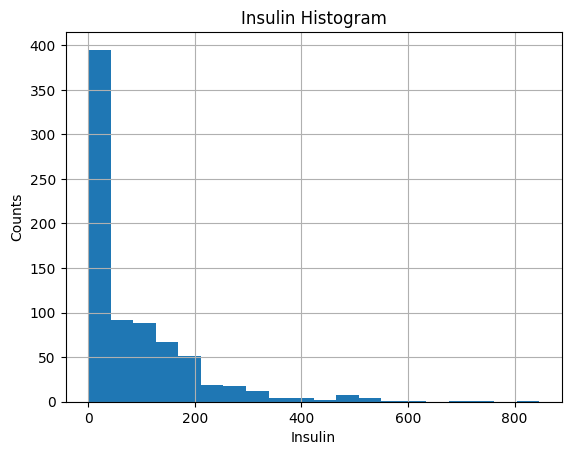

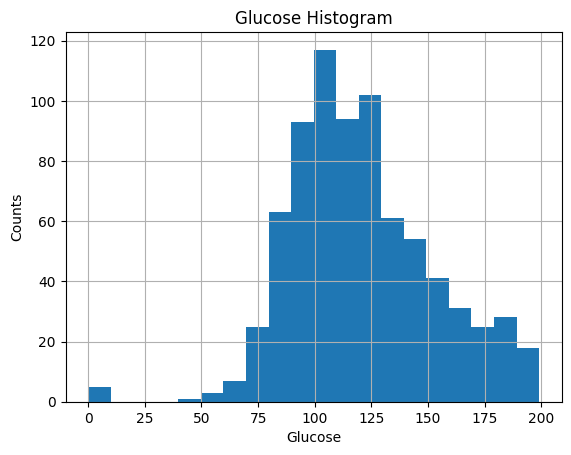

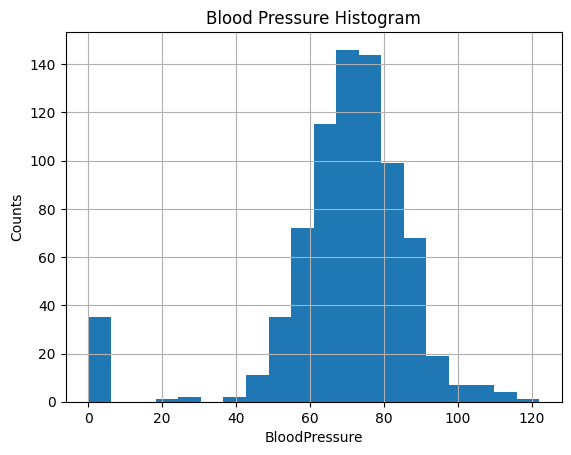

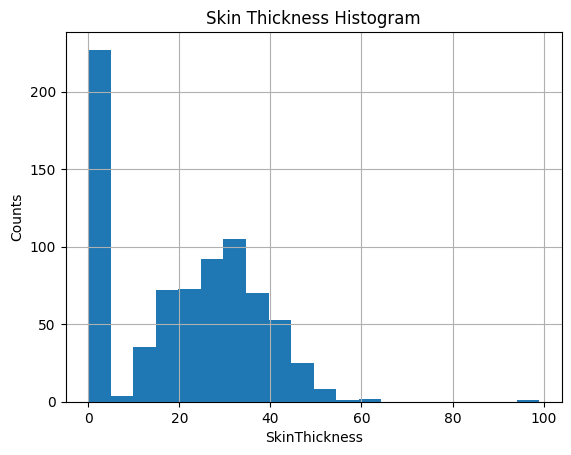

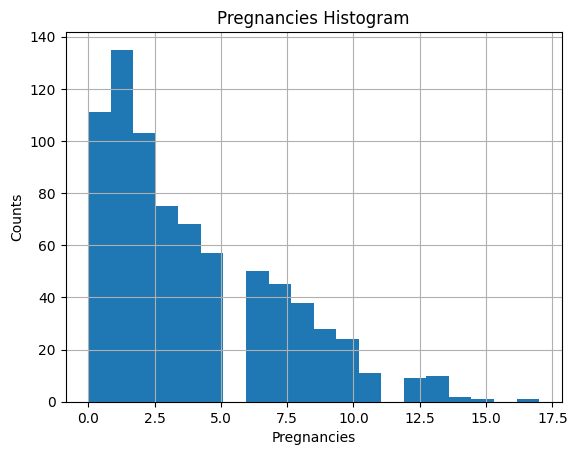

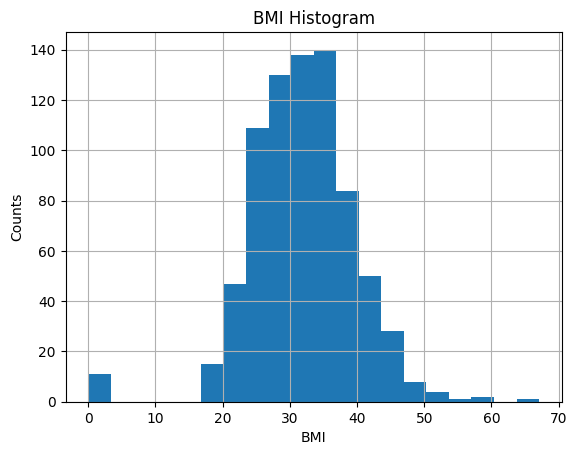

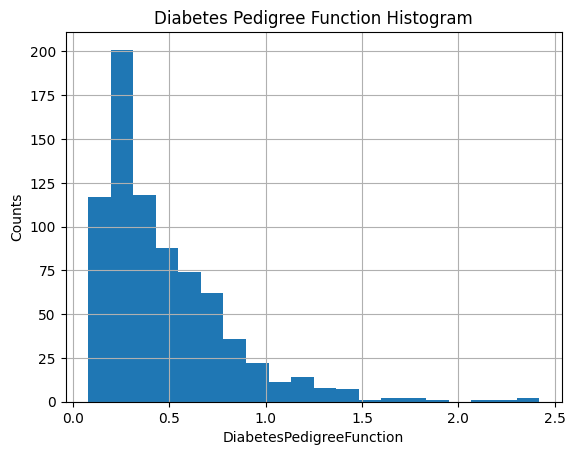

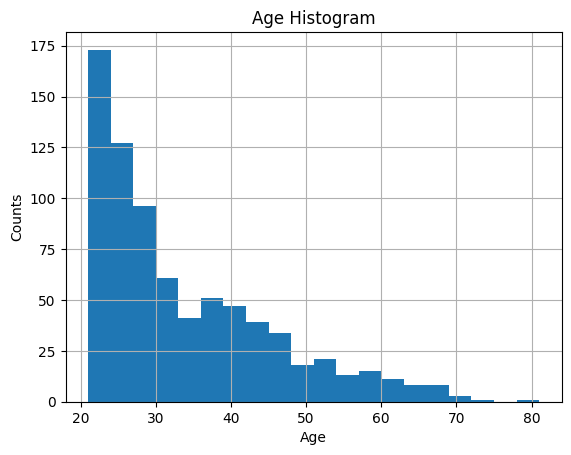

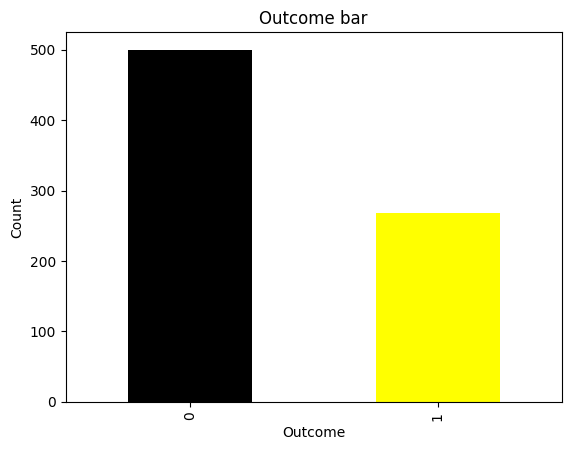

In [160]:
df = pd.read_csv('diabetes.csv')
df.describe()

df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

df['BloodPressure'].hist(bins=20)
plt.title('Blood Pressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

df['SkinThickness'].hist(bins=20)
plt.title('Skin Thickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('Diabetes Pedigree Function Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()


counts = df['Outcome'].value_counts()
counts.plot(kind='bar', color=['black', 'yellow'])
plt.title('Outcome bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Ερώτημα 2

Δεν είναι καλή η ποιότητα γιατί:



*   Υπάρχουν μηδενικές τιμές σε attributes όπως BMI, Insulin, Glucose και Blood Pressure.
*   Υπάρχουν πολλά σημεία στα οποία δεν υπάρχουν δεδομένα, ούτε μηδενικά (κενά σημεία).
*   Το δεύτερο θα έλεγα πως είναι μία κοινή παρατήρηση που υπάρχει στα attrs Insulin, SkinThickness, DiabetesPedigreeFunction και Pregnancies. Όλα τα ιστογράμματά τους έχουν μία δεξιά κλίση/κυρτότητα (δεξιότερα μειώνονται τα δεδομένα και δεν ακολουθούν το mean όπως στο πρώτο σκέλος).



# Ερώτημα 3

Δεν είναι κανονική κατανομή. Η κλίση/κυρτότητα του ιστογράμματος είναι δεξιά (λιγότερες μαζεμένες μεγάλες ηλικίες, και περισσότερες νεαρές ηλικίες), οπότε η κατανομή είναι ασύμμετρη. Το δεύτερο που θα ήθελα να αναφέρω, είναι πως δεν έχει 0νικά στο δείγμα, οπότε φαίνεται πλήρες δείγμα.


Τέλος, πέραν της μαθηματικής προσέγγισης, επειδή η ηλικία είναι σημαντική για θέματα υγείας, πιστεύω θα παίξει σημαντικό ρόλο (ίσως να έχει όμως μεγαλύτερο bias για τις μικρές ηλικίες λόγω μεγαλύτερο πλήθους δεδομένων σε σχέση με τις μεγάλες ηλικίες).

# Ερώτημα 4

Για το 75% του δείγματος έχουμε:

6.000000	**140.250000 (Glucose)**	80.000000	32.000000	127.250000	36.600000	0.626250	41.000000	1**.000000 (Outcome)**

Από τα δεδομένα που υπολογίσαμε στο 'df.describe()' φαίνεται ότι για το 75% του δείγματος διαγραμματικά, όσοι έχουν 140.250+ γλυκόζη έχουν και διαβήτη (1.00).

Εάν δε, συνυπολογίσουμε, ότι η μέση γλυκόζη είναι περίπου 121 και το 50% του δείγματος έχει από 117 γλυκόζη και πάνω, τότε ναι η γλυκόζη παίζει μεγάλο ρόλο στο αν κάποιος έχει διαβήτη ή οχι (λίγο πιο κάτω από το 50% του δείγματος).

# Ερώτημα 5

In [161]:
# prepare the dataset creating numpy arrays by splitting Outcome and the rest attrs
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

# create the training & testing sets for Outcome & the rest attrs respectively
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

# Ερώτημα 6

In [162]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)
accuracy
accuracy_percentage

77.92

Εφόσον το prediction είναι πολύ κοντά στο 80% (και θεωρείται θετικό αποτέλεσμα για το test set), σημαίνει πως το training set μας ήταν ρεαλιστικό. Επομένως η μεθοδολογία αυτή (Logistic Regression) καθώς και ο διαμοιρασμός training & test δεδομένων φαίνεται να απέδωσαν αποτελεσματικά.

# Ερώτημα 7

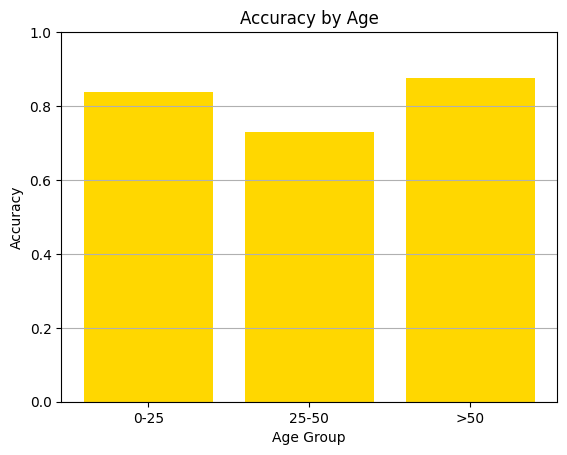

In [163]:
age_accuracy_df = pd.DataFrame(x_test, columns=input_df.columns)
age_accuracy_df['Outcome'] = y_test
age_accuracy_df['Prediction'] = y_pred

bins = [0, 25, 50, 150]
labels = ['0-25', '25-50', '>50']
age_accuracy_df['Age Group'] = pd.cut(age_accuracy_df['Age'], bins=bins, labels=labels, right=False)

accuracy_by_age_group = age_accuracy_df.groupby('Age Group', observed=True).apply(
    lambda group: accuracy_score(group['Outcome'], group['Prediction']), include_groups=False
)

plt.bar(accuracy_by_age_group.index, accuracy_by_age_group.values, color='gold')
plt.title('Accuracy by Age')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Ερώτημα 8

Πιστεύω πως θα ήταν καλύτερα να προβλέψει ότι έχει διαβήτη, και μετά από έναν έλεγχο δια ζώσης να διαπιστωθεί πως δεν έχει, παρά το αντίθετο σενάριο.

Στην πραγματική ζωή όμως, σημαντική προϋπόθεση είναι η επανεξέταση του ασθενή με σκοπό την επιβεβαίωση της πρόβλεψης και όχι ο χαρακτηρισμός του ως πάγιο ασθενή μόνο με την πρόβλεψη.

# Ερώτημα 9

In [164]:
seeds = list(range(10))
total_accuracies = []

for seed in seeds:

    # create the training & testing sets for Outcome & the rest attrs respectively
    test_size = 0.3
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

    # create the model using a configured methodology
    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # measure the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    total_accuracies.append(accuracy)

mean_accuracy = np.mean(total_accuracies)
std_accuracy = np.std(total_accuracies)
print("Mean:", round(mean_accuracy, 2))
print("Std:", round(std_accuracy, 2))

Mean: 0.77
Std: 0.02


# Ερώτημα 10

In [165]:
normalization_min_max = (input_df - input_df.min(axis=0)) / (input_df.max(axis=0) - input_df.min(axis=0))

df_normalized = pd.concat([normalization_min_max, df['Outcome']], axis=1)

df_normalized.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2ο κομμάτι

# Ερώτημα 1

In [166]:
df = pd.read_csv('diabetes.csv')
input_df = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
x = input_df.to_numpy()
y = df['Glucose'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


# Ερώτημα 2

In [167]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 13715.648430570738
Mean Absolute Error (MAE): 96.5562814123466


Πιστεύω πως επειδή στο δείγμα έχουμε πολλές ακραίες τιμές, το ΜΑΕ είναι καλύτερο, καθώς βεβαιώνει πως οι προβλέψεις θα ακολουθούν καλύτερα την πραγματικότητα (αφού υπολογίζει τη μέση διαφορά ανάμεσα σε πραγματικές/προβλεπόμενες τιμές, χωρίς να επηρεάζεται από τις ακραίες).

# Ερώτημα 3

In [168]:
alpha_values = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []
for alpha in alpha_values:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    results.append({'Alpha': alpha, 'MAE': mae, 'MSE': mse})

results_df = pd.DataFrame(results)
print(results_df)

   Alpha        MAE           MSE
0    0.2  96.562661  13717.968207
1    0.4  96.569040  13720.300443
2    0.6  96.575422  13722.644279
3    0.8  96.581804  13725.000317
4    1.0  96.588186  13727.368475


# Ερώτημα 4

In [169]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
linear_coefficients = model.coef_
lasso_coefficients = lasso_model.coef_
comparison_df = pd.DataFrame({
    'Feature': input_df.columns,
    'Linear_Coefficients': linear_coefficients,
    'Lasso_Coefficients': lasso_coefficients
})
print(comparison_df)

important_feature1 = input_df.columns[np.argmax(np.abs(linear_coefficients))]
print(f'Το πιο σημαντικό για το Linear είναι: {important_feature1}')
important_feature2 = input_df.columns[np.argmax(np.abs(lasso_coefficients))]
print(f'Το πιο σημαντικό για το Lasso είναι: {important_feature2}')


         Feature  Linear_Coefficients  Lasso_Coefficients
0    Pregnancies            -0.029702           -0.029702
1  BloodPressure             0.040292            0.040292
2            BMI             0.928179            0.928179
3            Age             0.740617            0.740617
Το πιο σημαντικό για το Linear είναι: BMI
Το πιο σημαντικό για το Lasso είναι: BMI
